In [1]:
import pyspark
sc = pyspark.SparkContext()

In [2]:
import random
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [5]:
data = sc.parallelize(list(range(0,10000)))
data.persist()
data_stat = data.histogram([0, 3000, 6000,10000])
data_stat

([0, 3000, 6000, 10000], [3000, 3000, 4000])

In [6]:
data_stat[1]

[3000, 3000, 4000]

In [7]:
len_data = data.count()

In [16]:
sel = np.arange(0.01,1.1,0.1)
acc = []
tp = [] 
for x in sel:
    startA = datetime.now()
    load_shedder = data.sample(False,x)
    load_shedder.persist()
    load_shedder.first()
    stopA = datetime.now()
    
    costA = ((stopA - startA).seconds * 10**6 + (stopA - startA).microseconds) / len_data 
    
    startB = datetime.now()
    new_data = load_shedder.histogram([0, 3000, 6000,9000])
    stopB = datetime.now()
    
    costB = ((stopB - startB).seconds * 10**6 + (stopB - startB).microseconds) / (len_data)
    error = np.linalg.norm(np.array(data_stat[1]) - np.array(new_data[1]) ,ord = 1) / np.linalg.norm(np.array(data_stat[1]),ord = 1)
    load_shedder.unpersist()
    
    tp.append(1 / (costA + x * costB))
    acc.append(1 - error)

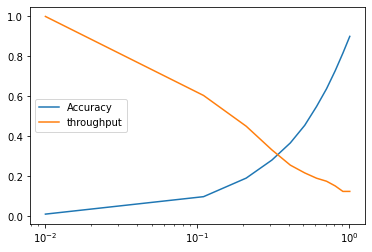

In [19]:
tp = tp / max(tp)
plt.figure()
plt.plot(sel,acc)
plt.plot(sel,tp)
plt.xscale('log')
plt.legend(['Accuracy','throughput'])
plt.show()